#Pertemuan 5 - Principal Component Analysis

### Nama : Zhafira Amanda
### NIM : 2406012114010
### Dataset : https://archive.ics.uci.edu/dataset/42/glass+identification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

kode di atas merupakan contoh penggunaan beberapa pustaka Python terkenal untuk analisis data dan reduksi dimensi.Pertama, import pandas as pd digunakan untuk mengimpor pustaka Pandas yang umum digunakan untuk manipulasi dan analisis data tabular. Kemudian, import matplotlib.pyplot as plt digunakan untuk membuat visualisasi data dengan menggunakan pustaka Matplotlib. Selanjutnya, from sklearn.preprocessing import StandardScaler mengimpor pustaka Scikit-learn untuk normalisasi data dengan menggunakan metode StandarScaler, yang akan mengubah distribusi data menjadi distribusi normal dengan mean 0 dan standar deviasi 1. Normalisasi ini sering digunakan sebelum analisis PCA (Principal Component Analysis).from sklearn.decomposition import PCA mengimpor modul PCA dari Scikit-learn, yang digunakan untuk analisis reduksi dimensi. PCA membantu mengurangi dimensi dataset dengan memproyeksikan data ke ruang dimensi yang lebih rendah, menjaga sebanyak mungkin varians dari data asli.

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
column_names = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class']
dataset = pd.read_csv(url, names=column_names)

Dalam kode diatas menggunakan pustaka Pandas untuk membaca dataset dari URL yang diberikan. Dataset ini berasal dari UCI Machine Learning Repository dan terkait dengan identifikasi jenis kaca berdasarkan properti kimia. Kolom dataset ditetapkan menggunakan parameter names sebagai ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class']. Setelah membaca dataset, informasi-informasi kimia seperti refraktif index (RI), kandungan unsur kimia seperti natrium (Na), magnesium (Mg), aluminium (Al), silikon (Si), kalium (K), kalsium (Ca), barium (Ba), besi (Fe), dan kelas jenis kaca disimpan dalam DataFrame yang dinamakan dataset.

In [3]:
dataset.head(15)

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [4]:
dataset.groupby('Class').size()

Class
1    70
2    76
3    17
5    13
6     9
7    29
dtype: int64

Kode diatas menggunakan metode groupby pada DataFrame dataset untuk mengelompokkan data berdasarkan kolom 'Class', yang mewakili jenis-jenis kaca dalam dataset. Selanjutnya, fungsi size() digunakan untuk menghitung jumlah data dalam setiap kelompok (kelas) secara terpisah. Hasilnya adalah serangkaian angka yang menunjukkan jumlah data yang terkait dengan setiap jenis kaca.

In [5]:
# Split the dataset to X and Y
X = dataset.iloc[:,1:12]
Y = dataset.iloc[:,5]

X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Dataset dibagi menjadi dua bagian: X dan Y. Variabel X mengandung subset dataset yang terdiri dari kolom kedua hingga kesebelas, yaitu 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'. Variabel Y, di sisi lain, berisi data dari kolom keenam, yaitu 'Si'. Jadi, X mengandung fitur-fitur atau variabel independen yang digunakan untuk menganalisis dan memodelkan data, sedangkan Y mengandung variabel dependen yang akan diprediksi atau dianalisis. Fungsi head() digunakan untuk menampilkan beberapa baris pertama dari DataFrame X agar dapat melihat contoh data yang digunakan dalam analisis.

### Standarisasi Data

In [6]:
features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

X = dataset.loc[:, features].values
Y = dataset.loc[:,['Class']].values
X = StandardScaler().fit_transform(X)

Pertama, terdapat pembuatan list 'features' yang berisi nama-nama kolom yang ingin diambil dari dataset. Dalam kasus ini, kolom-kolom tersebut adalah 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', dan 'Fe'. Selanjutnya, variabel X dibentuk dengan menggunakan metode .loc untuk mengambil hanya kolom-kolom yang terdapat dalam list 'features'. Variabel Y dibuat untuk menyimpan kolom 'Class', yang kemungkinan besar berisi label atau kategori yang akan diprediksi. Variabel ini memiliki tipe data array atau matriks. Langkah selanjutnya adalah normalisasi data menggunakan StandardScaler(). Fungsi ini digunakan untuk mengubah setiap fitur dalam variabel X sehingga memiliki rata-rata nol dan deviasi standar satu. Normalisasi ini penting dalam banyak algoritma pembelajaran mesin, termasuk PCA, untuk memastikan bahwa setiap fitur memiliki dampak yang sebanding dalam analisis.

## Proyeksi PCA ke 2D

In [7]:
# PCA
pca = PCA(n_components=2)
Principal_Components = pca.fit_transform(X)
data = Principal_Components
principalDF = pd.DataFrame(data, columns = ['principal component 1', 'principal component 2'])

PCA digunakan untuk mengurangi dimensi data, dan dalam hal ini, dikonfigurasi untuk menghasilkan dua komponen utama.Langkah pertama adalah membuat objek PCA dengan menyertakan parameter n_components=2, yang mengindikasikan bahwa kita hanya tertarik pada dua komponen utama. Selanjutnya, fungsi fit_transform(X) digunakan untuk mentransformasikan data awal (X) ke dalam ruang baru yang terdiri dari dua komponen utama.Hasil transformasi, kemudian disimpan dalam variabel Principal_Components. Data tersebut kemudian dimasukkan ke dalam suatu DataFrame baru menggunakan Pandas, dengan kolom-kolom bernama 'principal component 1' dan 'principal component 2'. DataFrame ini dapat digunakan untuk analisis lebih lanjut atau visualisasi hasil reduksi dimensi.

In [8]:
finalDf = pd.concat([principalDF, dataset[['Class']]], axis = 1)

kode diatas menggunakan pustaka Pandas untuk menggabungkan dua DataFrames, yaitu principalDF dan dataset'Class', menjadi satu DataFrame baru yang disimpan dalam variabel finalDf. Fungsi pd.concat() digunakan untuk menggabungkan DataFrames secara berdampingan (axis=1), sehingga kolom dari kedua DataFrames tersebut akan digabungkan berdampingan. DataFrame principalDF berperan sebagai DataFrame utama, sementara dataset'Class' menyediakan kolom 'Class' yang akan ditambahkan ke DataFrame utama.

In [9]:
finalDf.head()

,principal component 1,principal component 2,Class
0,1.151140,-0.529488,1
1,-0.574137,-0.759788,1
2,-0.940160,-0.929836,1
3,-0.142083,-0.961677,1
4,-0.351092,-1.091249,1


## Visualisasikan Proyeksi 2D

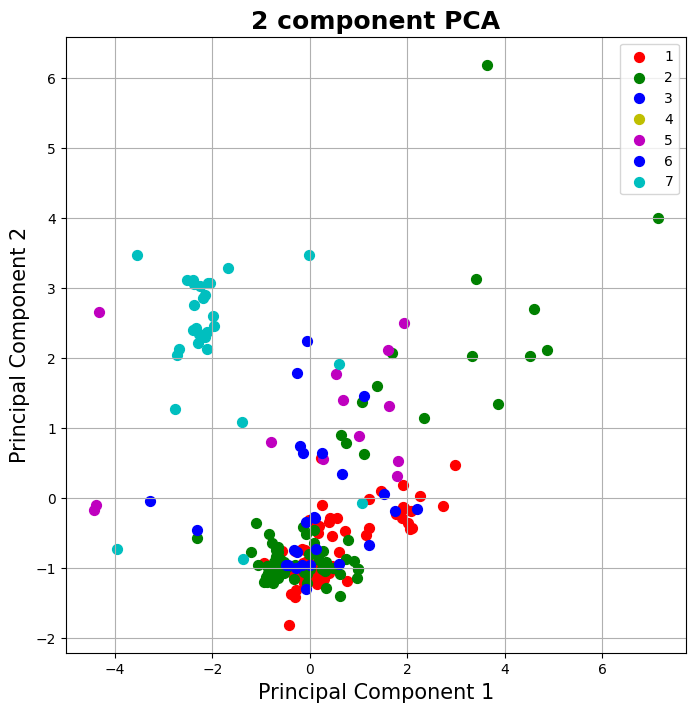

In [10]:
# Visualization
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 18, fontdict={'weight':'bold'})

targets = [1, 2, 3, 4, 5, 6, 7]
colors = ['r', 'g', 'b', 'y', 'm','b', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Dalam visualisasi ini menggunakan pustaka Matplotlib untuk membuat scatter plot dari dua komponen utama hasil analisis PCA. Ukuran gambar diatur menjadi 8x8 inci, dan sumbu x dan y diberi label sebagai 'Principal Component 1' dan 'Principal Component 2'. Scatter plot ini mewakili data dari DataFrame finalDf, di mana titik-titik tersebar sesuai dengan nilai komponen utama 1 dan 2. Setiap kelas (1 hingga 7) ditandai dengan warna yang berbeda (misalnya, merah, hijau, biru), dan legenda ditambahkan untuk memudahkan interpretasi.

## Varians yang Dijelaskan

In [11]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.27901819 0.2277858 ]
0.5068039901112689


Dapat dilihat pada output diatas menunjukkan dua nilai  dalam analisis Principal Component Analysis (PCA). Pertama, pca.explained_variance_ratio_ memberikan proporsi varians dari setiap principal component terhadap total varians dalam data. Dalam kasus ini, nilai tersebut adalah 0.279 untuk Principal Component 1 dan 0.228 untuk Principal Component 2. Kedua, dengan menjumlahkan nilai-nilai tersebut, kita mendapatkan informasi bahwa dua komponen utama tersebut dapat menjelaskan sekitar 50.7% dari varians total dalam data. Proporsi varians ini memberikan gambaran tentang seberapa baik informasi dari data asli dapat dijelaskan atau direpresentasikan oleh dua komponen utama yang dipilih. Semakin tinggi proporsi varians, semakin baik kemampuan komponen tersebut dalam merangkum informasi dari dataset asli.